# NYC Building Energy Efficiency Prediction

A supervised classification project using real-world energy benchmarking data from NYC buildings to predict whether a building is energy efficient based on its structural, usage, and energy consumption characteristics.

### Problem Statement 

New York City mandates large buildings to report their annual energy consumption. This dataset helps us understand energy usage patterns across the city. The goal of this project is to build a machine learning model that predicts whether a building is energy efficient or not based on features such as energy usage, property size, and other characteristics.

### Objective 

- Perform exploratory data analysis and preprocessing on the dataset.

- Engineer features and encode categorical variables.

- Train and evaluate multiple classification models (Decision Tree, Random Forest, Logistic Regression, SVM).

- Use hyperparameter tuning to optimize the best-performing model.

- Evaluate the final model using appropriate metrics.

- Derive actionable insights on key factors influencing building energy efficiency.

### Data Source 

- Source: NYC Open Data Portal / Kaggle

- File used: nyc_benchmarking_disclosure_data_reported_in_2016.csv

### Target Variable

- Energy Efficient: A binary variable where:

- 1 indicates the building is energy efficient

- 0 indicates it is not



## Data Exploration and Cleaning

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [4]:
df = pd.read_excel('nyc_benchmarking_disclosure_data_reported_in_2016.xlsx')

In [5]:
df_copy = df.copy()

In [6]:
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,350.0,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


**Check the Shape of the Dataset**

In [7]:
df.shape

(13223, 57)

**Check the columns present in the dataframe**

In [8]:
df.columns

Index(['Record Number', 'Order', 'NYC Borough, Block and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Wea

**Check the basic information about the dataset**

In [9]:
df.describe()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Street Number,Zip Code,Largest Property Use Type - Gross Floor Area (ft²),Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),...,Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal)
count,1.153100e+04,13223.00000,1.322200e+04,10380.000000,12627.000000,1.152700e+04,11526.000000,11531.000000,9535.000000,11439.000000,...,1.109700e+04,1.147800e+04,1.147100e+04,1.149500e+04,1.262700e+04,1.153100e+04,7.265000e+03,6391.000000,11531,5247.000000
mean,3.440970e+06,6612.00000,2.198121e+09,996.288247,10569.869011,1.641104e+05,1.387819,98.987512,57.735711,525.733377,...,2.380525e+06,6.952577e+03,1.340512e+03,5.605184e+03,1.636773e+05,1.709439e+05,2.579751e+04,126.303422,2016-05-15 11:24:30.392767488,6478.597370
min,7.365000e+03,1.00000,1.000048e+09,0.000000,0.000000,5.800000e+01,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.335860e+04,5.000800e+04,0.000000e+00,0.000000e+00,0.000000,2016-02-19 12:08:50,1.000000
25%,2.734774e+06,3306.50000,1.013110e+09,146.000000,10024.000000,6.536950e+04,1.000000,100.000000,34.000000,65.300000,...,3.026190e+05,3.420250e+02,1.715000e+02,8.630000e+01,6.500000e+04,6.717600e+04,2.661700e+03,28.240000,2016-04-21 10:03:55,2876.300000
50%,3.111728e+06,6612.00000,2.029920e+09,441.000000,10456.000000,9.226600e+04,1.000000,100.000000,63.000000,82.400000,...,5.454674e+05,5.198000e+02,3.051000e+02,1.580000e+02,9.240000e+04,9.491000e+04,4.745600e+03,45.700000,2016-04-29 09:31:42,4799.800000
75%,4.371063e+06,9917.50000,3.061218e+09,1300.250000,11222.000000,1.557285e+05,1.000000,100.000000,83.000000,103.000000,...,1.311119e+06,9.394500e+02,5.050000e+02,4.067000e+02,1.563555e+05,1.615295e+05,8.057900e+03,71.680000,2016-05-31 13:43:25,7732.800000
max,5.053345e+06,13223.00000,5.080080e+09,76179.000000,11694.000000,6.940450e+06,161.000000,100.000000,100.000000,801504.700000,...,3.046183e+09,1.501468e+07,5.852949e+06,1.501455e+07,1.343508e+07,6.940450e+06,4.385740e+07,73011.090000,2016-08-01 23:04:11,129781.600000
std,8.500920e+05,3817.29564,1.218340e+09,1550.762447,645.826741,2.569770e+05,3.631729,6.941736,30.143817,10120.105154,...,3.576546e+07,1.692231e+05,5.949074e+04,1.583246e+05,2.993519e+05,2.680820e+05,5.860239e+05,1483.749849,NaN,7090.965112


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13223 entries, 0 to 13222
Data columns (total 57 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Record Number                                                    11531 non-null  float64       
 1   Order                                                            13223 non-null  int64         
 2   NYC Borough, Block and Lot (BBL)                                 13222 non-null  float64       
 3   Co-reported BBL Status                                           615 non-null    object        
 4   BBLs Co-reported                                                 615 non-null    object        
 5   Reported NYC Building Identification Numbers (BINs)              11978 non-null  object        
 6   Property Name                                                    11531 non-nul

**Check for missing values**

In [11]:
df.isnull().sum().sort_values(ascending=False)

Co-reported BBL Status                                             12608
BBLs Co-reported                                                   12608
Reported Water Method                                               7976
DEP Provided Water Use (kgal)                                       7976
Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)     6832
Automatic Water Benchmarking Eligible                               5958
Water Use (All Water Sources) (kgal)                                5958
Weather Normalized Site Natural Gas Intensity (therms/ft²)          3760
Weather Normalized Site Natural Gas Use (therms)                    3758
ENERGY STAR Score                                                   3688
Weather Normalized Source EUI (kBtu/ft²)                            3375
Weather Normalized Site EUI (kBtu/ft²)                              3375
Natural Gas Use (kBtu)                                              3136
Street Number                                      

In [12]:
df['ENERGY STAR Score'].head()

0    87.0
1    79.0
2    80.0
3    10.0
4     NaN
Name: ENERGY STAR Score, dtype: float64

### Target Column Creation

In [13]:
# we will classify building as efficient if ENERGY STAR Score >= 75
df['Energy Efficient'] = df['ENERGY STAR Score'].apply(lambda x: 1 if x>=75 else 0 )

### Drop high-missing or irrelevant columns

In [14]:
# drop columns with more than 40% mising data
threshold = len(df)*0.4
df_cleaned = df.dropna(thresh=threshold,axis=1)

In [15]:
df_cleaned.columns

Index(['Record Number', 'Order', 'NYC Borough, Block and Lot (BBL)',
       'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)'

In [16]:
# Then, drop irrelevant or identifier columns:

irrelevant_cols = [
    'Record Number', 'Order',
    'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
    'Parent Property Id', 'Parent Property Name', 'Street Number', 
    'Street Name', 'Zip Code', 'Release Date'
]

df_cleaned = df_cleaned.drop(columns=irrelevant_cols)


In [17]:
df_cleaned.shape

(13223, 44)

In [18]:
df_cleaned.columns

Index(['NYC Borough, Block and Lot (BBL)', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
   

### Drop rows with missing values in key features

In [19]:
required_cols = [
    'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Source EUI (kBtu/ft²)',
    'Largest Property Use Type', 'Year Built'
]

df_cleaned = df_cleaned.dropna(subset=required_cols)


In [20]:
# convert Year Built column to numeric
df_cleaned['Year Built'] = pd.to_numeric(df_cleaned['Year Built'],errors = 'coerce')

In [21]:
df_cleaned['Year Built'].dtype

dtype('int64')

In [22]:
df_cleaned['Year Built'].isnull().sum()

0

In [23]:
df_cleaned.shape

(9535, 44)

In [24]:
df_cleaned['Energy Efficient'].value_counts()

Energy Efficient
0    6055
1    3480
Name: count, dtype: int64

In [25]:
df_cleaned['Energy Efficient'] = df_cleaned['ENERGY STAR Score'].apply(lambda x: 1 if x >= 75 else 0)


### Checking the basic info of the cleaned DataFrame

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 11977
Data columns (total 44 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   NYC Borough, Block and Lot (BBL)                                 9534 non-null   float64
 1   Borough                                                          9535 non-null   object 
 2   DOF Benchmarking Submission Status                               9535 non-null   object 
 3   Primary Property Type - Self Selected                            9535 non-null   object 
 4   List of All Property Use Types at Property                       9535 non-null   object 
 5   Largest Property Use Type                                        9535 non-null   object 
 6   Largest Property Use Type - Gross Floor Area (ft²)               9535 non-null   float64
 7   2nd Largest Property Use Type                 

## Keep the selected column only 

In [27]:
selected_columns = [
    'Borough',
    'Primary Property Type - Self Selected',
    'Largest Property Use Type',
    'Year Built',
    'Number of Buildings - Self-reported',
    'Occupancy',
    'DOF Property Floor Area (ft²)',
    'Property GFA - Self-reported (ft²)',
    'Site EUI (kBtu/ft²)',
    'Weather Normalized Site EUI (kBtu/ft²)',
    'Source EUI (kBtu/ft²)',
    'Weather Normalized Source EUI (kBtu/ft²)',
    'Natural Gas Use (kBtu)',
    'Electricity Use - Grid Purchase (kBtu)',
    'Total GHG Emissions (Metric Tons CO2e)',
    'Direct GHG Emissions (Metric Tons CO2e)',
    'Indirect GHG Emissions (Metric Tons CO2e)',
    'Energy Efficient'  # target
]


In [28]:
df_model = df_cleaned[selected_columns].copy()



In [29]:
df_model.shape

(9535, 18)

In [30]:
df_model.head()

,Borough,Primary Property Type - Self Selected,Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Energy Efficient
0,Manhattan,Multifamily Housing,Multifamily Housing,1982,1.0,100.0,98052.0,98000.0,73.7,74.4,115.0,115.7,5463399.1,1762214.1,436.3,290.2,146.1,1
1,Manhattan,Multifamily Housing,Multifamily Housing,1950,1.0,95.0,58851.0,57401.0,51.3,50.9,108.8,107.1,1437732.8,1507302.8,201.4,76.4,125.0,1
2,Manhattan,Multifamily Housing,Multifamily Housing,1964,1.0,95.0,166432.0,166433.0,44.9,44.5,106.7,105.2,2739020.0,4737201.3,538.4,145.5,392.9,1
3,Manhattan,Multifamily Housing,Multifamily Housing,1960,1.0,95.0,114939.0,114939.0,91.3,90.8,182.4,180.7,5733933.4,4759700.8,699.3,304.6,394.7,0
5,Manhattan,Office,Office,1970,1.0,100.0,2542563.0,2428325.0,133.8,133.8,300.2,300.2,38618831.6,177603017.4,23995.9,2051.2,21944.6,0


**Check and Fill the Missing Values**

In [31]:
df_model.isnull().sum()

Borough                                         0
Primary Property Type - Self Selected           0
Largest Property Use Type                       0
Year Built                                      0
Number of Buildings - Self-reported             3
Occupancy                                       0
DOF Property Floor Area (ft²)                 216
Property GFA - Self-reported (ft²)              0
Site EUI (kBtu/ft²)                             0
Weather Normalized Site EUI (kBtu/ft²)       1323
Source EUI (kBtu/ft²)                           0
Weather Normalized Source EUI (kBtu/ft²)     1323
Natural Gas Use (kBtu)                       1077
Electricity Use - Grid Purchase (kBtu)         32
Total GHG Emissions (Metric Tons CO2e)          2
Direct GHG Emissions (Metric Tons CO2e)        12
Indirect GHG Emissions (Metric Tons CO2e)       2
Energy Efficient                                0
dtype: int64

In [32]:
df_model.head()

,Borough,Primary Property Type - Self Selected,Largest Property Use Type,Year Built,Number of Buildings - Self-reported,Occupancy,DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Energy Efficient
0,Manhattan,Multifamily Housing,Multifamily Housing,1982,1.0,100.0,98052.0,98000.0,73.7,74.4,115.0,115.7,5463399.1,1762214.1,436.3,290.2,146.1,1
1,Manhattan,Multifamily Housing,Multifamily Housing,1950,1.0,95.0,58851.0,57401.0,51.3,50.9,108.8,107.1,1437732.8,1507302.8,201.4,76.4,125.0,1
2,Manhattan,Multifamily Housing,Multifamily Housing,1964,1.0,95.0,166432.0,166433.0,44.9,44.5,106.7,105.2,2739020.0,4737201.3,538.4,145.5,392.9,1
3,Manhattan,Multifamily Housing,Multifamily Housing,1960,1.0,95.0,114939.0,114939.0,91.3,90.8,182.4,180.7,5733933.4,4759700.8,699.3,304.6,394.7,0
5,Manhattan,Office,Office,1970,1.0,100.0,2542563.0,2428325.0,133.8,133.8,300.2,300.2,38618831.6,177603017.4,23995.9,2051.2,21944.6,0


In [33]:
#fill the missing values with their median values
cols_to_fill = ['Number of Buildings - Self-reported','DOF Property Floor Area (ft²)','Weather Normalized Site EUI (kBtu/ft²)',
                'Weather Normalized Source EUI (kBtu/ft²)','Natural Gas Use (kBtu)','Electricity Use - Grid Purchase (kBtu)',
                'Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)']

for col in cols_to_fill:
    df_model[col] = df_model[col].fillna(df_model[col].median())

In [34]:
df_model.isnull().sum()

Borough                                      0
Primary Property Type - Self Selected        0
Largest Property Use Type                    0
Year Built                                   0
Number of Buildings - Self-reported          0
Occupancy                                    0
DOF Property Floor Area (ft²)                0
Property GFA - Self-reported (ft²)           0
Site EUI (kBtu/ft²)                          0
Weather Normalized Site EUI (kBtu/ft²)       0
Source EUI (kBtu/ft²)                        0
Weather Normalized Source EUI (kBtu/ft²)     0
Natural Gas Use (kBtu)                       0
Electricity Use - Grid Purchase (kBtu)       0
Total GHG Emissions (Metric Tons CO2e)       0
Direct GHG Emissions (Metric Tons CO2e)      0
Indirect GHG Emissions (Metric Tons CO2e)    0
Energy Efficient                             0
dtype: int64

In [35]:
df_model.shape

(9535, 18)

In [36]:
df_model['Borough'].value_counts()

Borough
Manhattan        4084
Brooklyn         1901
Queens           1648
Bronx            1643
Not Available     148
Staten Island     106
Brooklyn            5
Name: count, dtype: int64

## Handle Categorical columns

**As machine did not understand the alphabets or words we need to encode them and convert it into numerical format**

we are using one-hot encoding for that

In [37]:
categorical_cols = ['Borough', 'Primary Property Type - Self Selected', 'Largest Property Use Type']

# Apply one-hot encoding
df_model_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)


In [38]:
print(df_model_encoded.shape)

(9535, 65)


In [39]:
df_model_encoded.head()

,Year Built,Number of Buildings - Self-reported,Occupancy,DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),...,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Parking,Largest Property Use Type_Refrigerated Warehouse,Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Retail Store,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,1982,1.0,100.0,98052.0,98000.0,73.7,74.4,115.0,115.7,5463399.1,...,False,False,False,False,False,False,False,False,False,False
1,1950,1.0,95.0,58851.0,57401.0,51.3,50.9,108.8,107.1,1437732.8,...,False,False,False,False,False,False,False,False,False,False
2,1964,1.0,95.0,166432.0,166433.0,44.9,44.5,106.7,105.2,2739020.0,...,False,False,False,False,False,False,False,False,False,False
3,1960,1.0,95.0,114939.0,114939.0,91.3,90.8,182.4,180.7,5733933.4,...,False,False,False,False,False,False,False,False,False,False
5,1970,1.0,100.0,2542563.0,2428325.0,133.8,133.8,300.2,300.2,38618831.6,...,False,True,False,False,False,False,False,False,False,False


**Here we can see that df_model had 18 columns but when i have encoded it the number of columns increased to 65. why ?**

✅ Example

If "Borough" had these 5 unique values:

- Manhattan

- Brooklyn

- Bronx

- Queens

- Staten Island

Then **pd.get_dummies(df, columns=['Borough'], drop_first=True)** will create 4 new columns:

'Borough_Brooklyn'

'Borough_Bronx'

'Borough_Queens'

'Borough_Staten Island'

It drops the first one (Manhattan in this case) to avoid multicollinearity.

So for each of your 3 categorical columns, if they have many unique values, each one turns into several binary columns.

### Define Features and Target Variable

**Split the data into Targets(x) and Features(y)**

In [40]:
x = df_model_encoded.drop('Energy Efficient',axis=1)

In [41]:
y = df_model_encoded['Energy Efficient']

**Train Test Split**

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

#stratify=y ensures that both train and test sets have the same proportion of 0s and 1s in the target.

### Train DecisionTree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

**Make Predictions on Test Values**

In [44]:
# predictions 
y_pred = model.predict(x_test)

**Evaluate the model based on different Metrics**

In [45]:
# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy_score:\n',accuracy_score(y_test,y_pred))
print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('\n Classification Report:\n',classification_report(y_test,y_pred))

Accuracy_score:
 0.8315274379587557

 Confusion Matrix:
 [[1581  236]
 [ 246  798]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1817
           1       0.77      0.76      0.77      1044

    accuracy                           0.83      2861
   macro avg       0.82      0.82      0.82      2861
weighted avg       0.83      0.83      0.83      2861



**Visualize the Confusion Matrix**

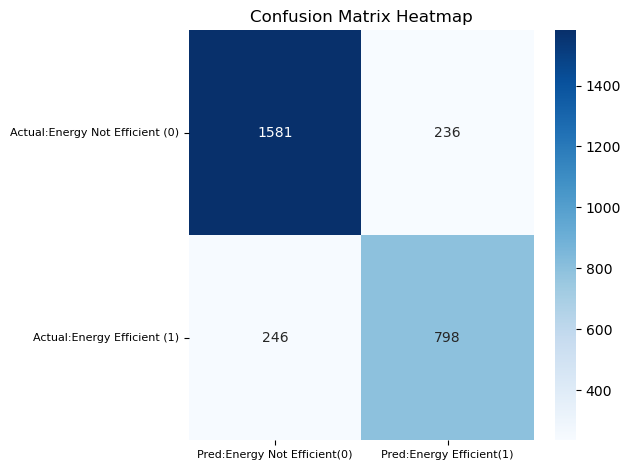

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',xticklabels=['Pred:Energy Not Efficient(0)','Pred:Energy Efficient(1)'],
            yticklabels=['Actual:Energy Not Efficient (0)','Actual:Energy Efficient (1)'],cmap='Blues')

# Rotate the x-axis tick labels to horizontal
plt.xticks(rotation=0,fontsize=8)

# Optionally rotate y-axis to make it neater (not necessary)
plt.yticks(rotation=0,fontsize=8)

# Add a title (optional)
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

## Cross Validation with Decision Tree 

In [47]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.8474043  0.82642895 0.85317252 0.82642895 0.7986366 ]
Average CV accuracy: 0.8304142632406922


### Through the cross validation we have visualized that our average accuracy is 83%

## Visualize Feature Importance from the Decision Tree

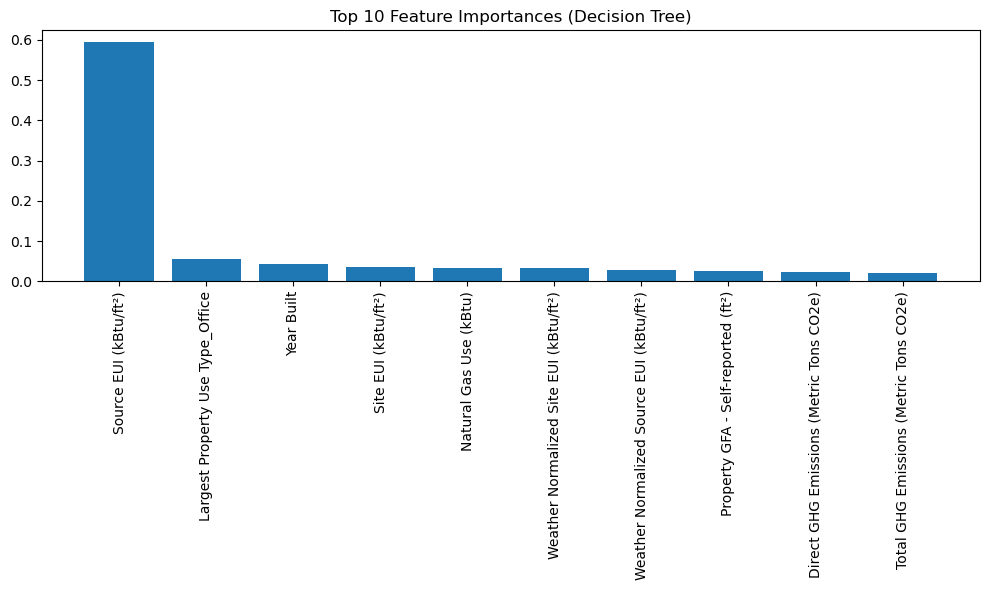

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = model.feature_importances_
features = x.columns
indices = importances.argsort()[::-1]

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.bar(range(10), importances[indices][:10], align="center")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()


**Thus we can see that Source EUI column is the most important feature we have**

## Try other models

**Scale the Features (for models like Logistic Regression, SVM)**

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

for name, clf in models.items():
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    print(f'{name} Accuracy: {acc:.4f}')



Decision Tree Accuracy: 0.8312
Random Forest Accuracy: 0.8780


C:\Users\Shubham Sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8287
SVM Accuracy: 0.6351


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, clf in models.items():
    y_pred = clf.predict(x_test)
    print(f'\n{name} Classification Report:\n')
    print(classification_report(y_test, y_pred,target_names=["Not Efficient", "Efficient"]))



Decision Tree Classification Report:

               precision    recall  f1-score   support

Not Efficient       0.86      0.87      0.87      1817
    Efficient       0.77      0.76      0.77      1044

     accuracy                           0.83      2861
    macro avg       0.82      0.82      0.82      2861
 weighted avg       0.83      0.83      0.83      2861


Random Forest Classification Report:

               precision    recall  f1-score   support

Not Efficient       0.90      0.91      0.90      1817
    Efficient       0.84      0.82      0.83      1044

     accuracy                           0.88      2861
    macro avg       0.87      0.86      0.87      2861
 weighted avg       0.88      0.88      0.88      2861


Logistic Regression Classification Report:

               precision    recall  f1-score   support

Not Efficient       0.84      0.90      0.87      1817
    Efficient       0.80      0.71      0.75      1044

     accuracy                           0.83

C:\Users\Shubham Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shubham Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shubham Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary of Model Performance (Focusing on Class 1 – Efficient):

| Model             | Precision (Eff) | Recall (Eff) | F1-score (Eff) | Accuracy |
| ----------------- | --------------- | ------------ | -------------- | -------- |
| **Decision Tree** | 0.77            | 0.76         | 0.77           | 0.83     |
| **Random Forest** | **0.84**        | **0.82**     | **0.83**       | **0.88** |
| Logistic Reg.     | 0.80            | 0.71         | 0.75           | 0.83     |
| SVM               | 0.00            | 0.00         | 0.00           | 0.64     |


### Conclusion: Best Model = Random Forest

- Highest F1-score for Efficient buildings (0.83) — best balance of precision and recall.

- Highest overall accuracy (0.88).

- Handles imbalanced class better than others.

- Logistic Regression underperforms on recall.

- SVM is clearly failing on the minority class (recall = 0.00).



In [52]:
#Thus we can see we have imbalanced class with Efficient as minority class
print(y.value_counts(normalize=True))


Energy Efficient
0    0.635029
1    0.364971
Name: proportion, dtype: float64


## Improve Random Forest with Hyperparameter Tuning

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# define the hyperparamter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}


# base Model
rf = RandomForestClassifier(random_state=42)

# initialize the Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='f1', verbose=1,n_jobs=-1)

# fit to the Training data
grid_search.fit(x_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)  # gives us the best hyperparameters
print("Best CV Accuracy:", grid_search.best_score_)  # 


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Best CV Accuracy: 0.8396048999966853


In [111]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [112]:
test_accuracy = best_rf.score(x_test, y_test)
print(f"Test Accuracy with tuned RF: {test_accuracy:.4f}")


Test Accuracy with tuned RF: 0.8868


## CONCLUSION

In this project, we analyzed the 2016 NYC Building Energy Benchmarking dataset to predict whether a building is 
energy efficient (based on ENERGY STAR Score ≥ 75).

**Problem Solved:**

We built a classification model that identifies energy-efficient buildings using features like:

- Property type, year built, floor area,

- Energy usage (Electricity, Natural Gas, EUI),

- Emissions data, occupancy, etc.

**Final Model Selection:**
    
After comparing multiple models:

- Decision Tree

- Random Forest

- Logistic Regression

- Support Vector Machine (SVM)

We found that:

| Model               | Accuracy | F1-Score (Efficient Class) |
| ------------------- | -------- | -------------------------- |
| Decision Tree       | 83%      | 0.77                       |
| Logistic Regression | 83%      | 0.75                       |
| SVM                 | 64%      | 0.00                       |
| **Random Forest**   | **88%**  | **0.83**                   |


**Thus, Random Forest outperformed others in both overall accuracy and F1-score, making it the best model for our task.**

**Hyperparameter Tuning**
                                                                                                         
We performed GridSearchCV to optimize parameters like:

n_estimators

max_depth

criterion

However, the tuned model did not outperform the default Random Forest. This shows that in some cases, the default configuration can already be 
optimal for the given data.

**Class Imbalance Handling**
       
Our dataset had ~63% Not Efficient and ~37% Efficient classes.

Hence, we used F1-score along with accuracy for fair comparison.




### SUMMARY

This project demonstrates a full end-to-end ML pipeline: from data cleaning and feature selection to model comparison and interpretation. The Random Forest classifier with default parameters performed best, achieving a good balance between accuracy and F1-score despite class imbalance.

## Model Accuracy comparision chart

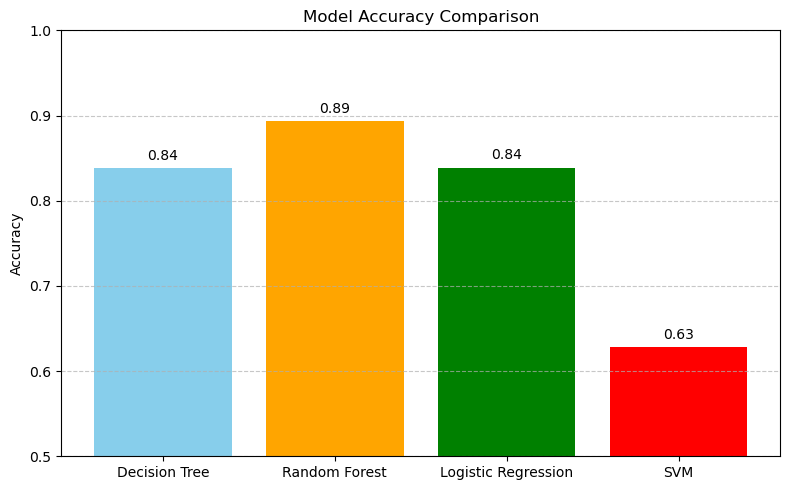

In [55]:
import matplotlib.pyplot as plt

# Sample model scores (you can update if needed)
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
accuracies = [0.8380, 0.8932, 0.8385, 0.6277]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0.5, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.tight_layout()
plt.show()
